# 207. Course Schedule

There are a total of n courses you have to take, labeled from 0 to n-1.

Some courses may have prerequisites, for example to take course 0 you have to first take course 1, which is expressed as a pair: [0,1]

Given the total number of courses and a list of prerequisite pairs, is it possible for you to finish all courses?

Example 1:

Input: 2, [[1,0]] 

Output: true
Explanation: There are a total of 2 courses to take. 
             To take course 1 you should have finished course 0. So it is possible.

Example 2:

Input: 2, [[1,0],[0,1]]

Output: false
Explanation: There are a total of 2 courses to take. 
             To take course 1 you should have finished course 0, and to take course 0 you should
             also have finished course 1. So it is impossible.


As mentioned in the problem statement, such a problem is a natural fit for graph based algorithms and we can easily model the elements in the problem statement as a graph. First of all, let's look at the graphical representation of the problem and it's components and then we will move onto the solutions.

We can represent the information provided in the question in the form of a graph.

* Let G(V, E)G(V,E) represent a directed, unweighted graph.
* Each course would represent a vertex in the graph.
* The edges are modeled after the prerequisite relationship between courses. So, we are given, that a pair such as [a, b][a,b] in the question means the course b is a prerequisite for the course a. This can be represented as a directed edge b ➔ a in the graph.
* The graph is a cyclic graph because there is a possibility of a cycle in the graph. If the graph would be acyclic, then an ordering of subjects as required in the question would always be possible. Since it's mentioned that such an ordering may not always be possible, that means we have a cyclic graph.

Let's look at a sample graph representing a set of courses where such an ordering is possible and one where such an ordering is not possible. It will be easier to explain the approaches once we look at two sample graphs.

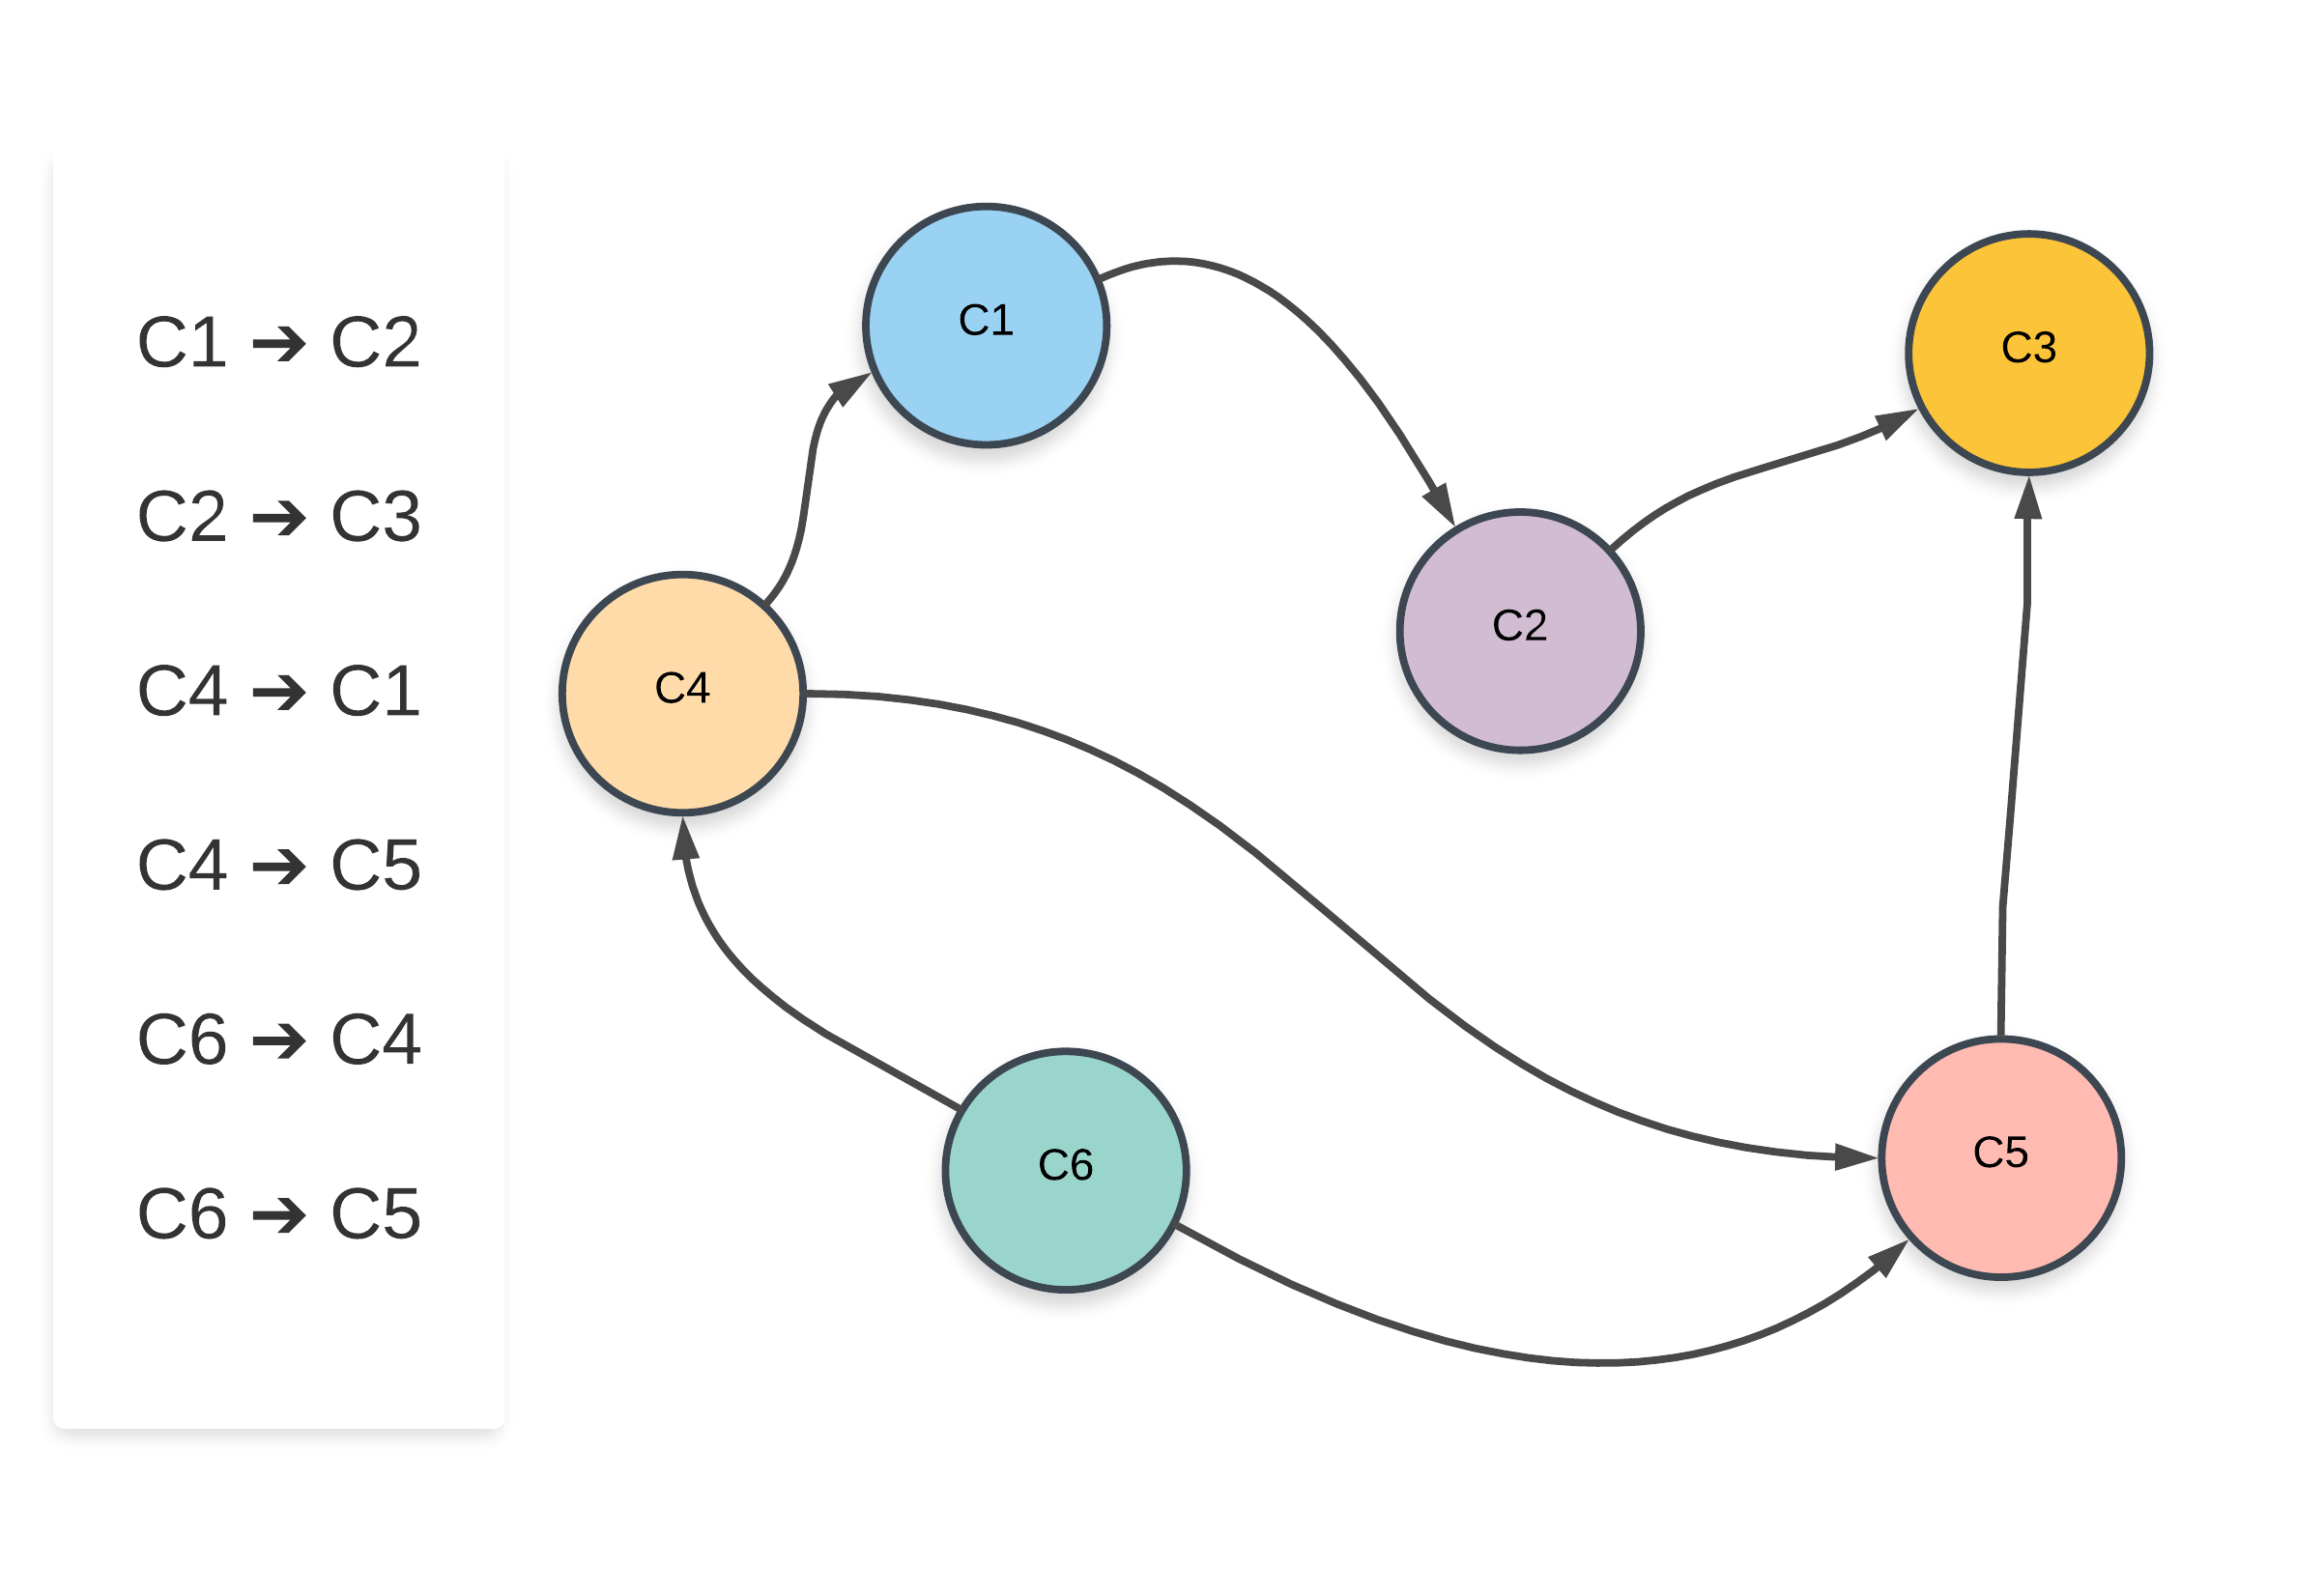

For the sample graph shown above, one of the possible ordering of courses is: C6 ➔ C4 ➔ C1 ➔ C5 ➔ C2 ➔ C3 and another possible ordering of subjects is C6 ➔ C4 ➔ C5 ➔ C1 ➔ C2 ➔ C3. Now let's look at a graph where no such ordering of courses is possible.

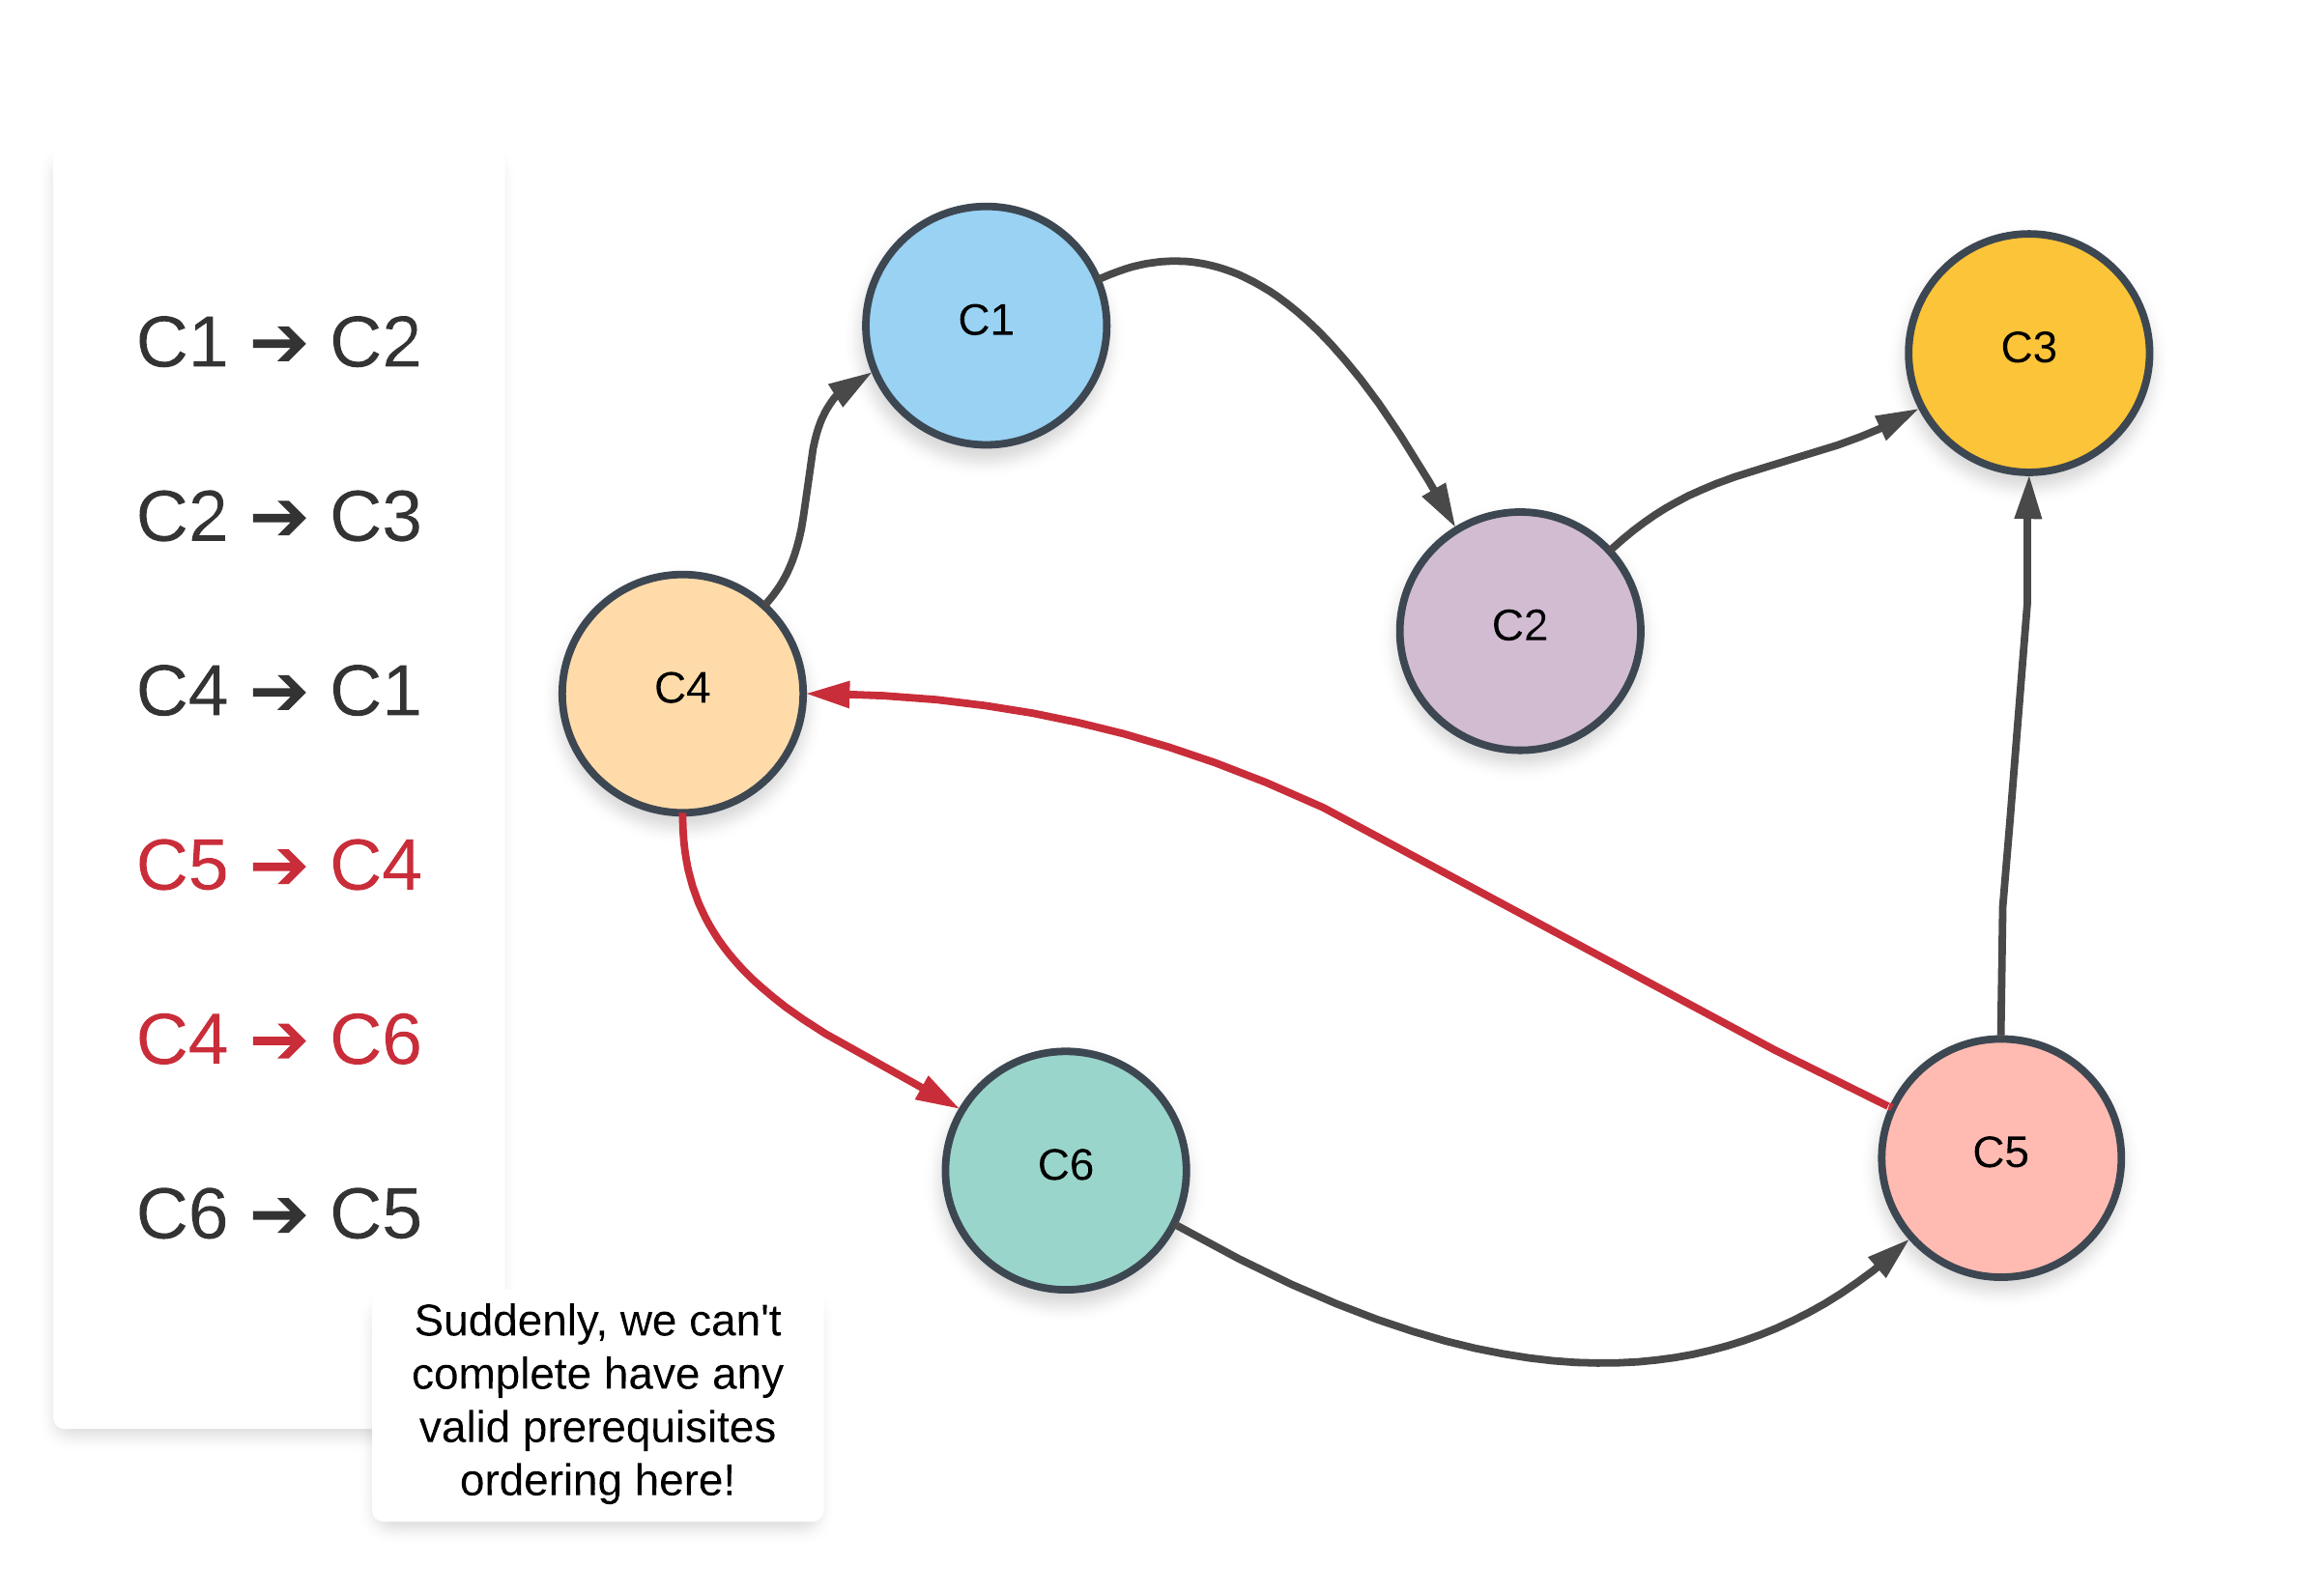



## BFS

BFS uses the indegrees of each node. We will first try to find a node with 0 indegree. If we fail to do so, there must be a cycle in the graph and we return false. Otherwise we set its indegree to be -1 to prevent from visiting it again and reduce the indegrees of its neighbors by 1. This process will be repeated for n (number of nodes) times.

In [ ]:
def canFinish(numCourses: int, prerequisites: List[List[int]]) -> bool:
    forward = {i:set() for i in range(numCourses)}
    backward = collections.defaultdict(set)
    for i,j in prerequisites:
        forward[i].add(j)
        backward[j].add(i)
    # BFS from the end to the front
    queue = collections.deque([node for node in forward if len(forward[node]) == 0])
    while queue:
        node = queue.popleft()
        for neighbor in backward[node]:
            forward[neighbor].remove(node)
            if len(forward[neighbor]) == 0:
                queue.append(neighbor)
        forward.pop(node)
    return not forward

In [ ]:
def canFinish(numCourses, prerequisites):
    forward = {i:set() for i in range(numCourses)}
    backward = collections.defaultdict(set)
    for i,j in prerequisites:
        forward[i].add(j)
        backward[j].add(i)
    # DFS from th eend to the front
    stack = [node for node in forward if len(forward[node]) == 0]
    while stack:
        node = stack.pop()
        for nei in backward[node]:
            forward[nei].remove(node)
            if len(forward[nei]) == 0:
                stack.append(nei)
        forward.pop(node)
    return not forward

## DFS:
* if node v has not been visited, then mark it as 0.
* if node v is being visited, then mark it as -1. If we find a vertex marked as -1 in DFS, then their is a ring.
* if node v has been visited, then mark it as 1. If a vertex was marked as 1, then no ring contains v or its successors.

In [ ]:
def canFinish(numCourses, prerequisites):
    graph = [[] for _ in range(numCourses)]
    visited = [0 for _ in range(numCourses)] # node v not been visited, mark it as 0
    # create of graph
    for u,v in prerequisites:
        graph[u].append(v)

    def dfs(i):
        # if node i is being visited, then mark it as -1
        # If we find a node marked as -1 in DFS, then there is a ring
        if visited[i] == -1:
            return False
        # if it is done visited, then do not visit again 
        if visited[i] == 1:
            return True
        # mark as being visited
        visited[i] = -1 
        for neighbor in graph[i]:
            if not dfs(neighbor):
                return False
        # after visit all the neighbours, mark it as done visited
        visited[i] = 1
        return True

    # for each vertex in graph
    for i in range(numCourses):
        if not dfs(i):
            return False
    return True

# 210. Course Schedule II
There are a total of n courses you have to take, labeled from 0 to n-1.

Some courses may have prerequisites, for example to take course 0 you have to first take course 1, which is expressed as a pair: [0,1]

Given the total number of courses and a list of prerequisite pairs, return the ordering of courses you should take to finish all courses.

There may be multiple correct orders, you just need to return one of them. If it is impossible to finish all courses, return an empty array.

Example 1:

Input: 2, [[1,0]] 

Output: [0,1]

Explanation: There are a total of 2 courses to take. To take course 1 you should have finished   
             course 0. So the correct course order is [0,1] .
Example 2:

Input: 4, [[1,0],[2,0],[3,1],[3,2]]

Output: [0,1,2,3] or [0,2,1,3]

Explanation: There are a total of 4 courses to take. To take course 3 you should have finished both     
             courses 1 and 2. Both courses 1 and 2 should be taken after you finished course 0. 
             So one correct course order is [0,1,2,3]. Another correct ordering is [0,2,1,3] .
             
Note:

* The input prerequisites is a graph represented by a list of edges, not adjacency matrices. Read more about how a graph is represented.
* You may assume that there are no duplicate edges in the input prerequisites.

## Approach 1: Using Depth First Search
Intuition

Suppose we are at a node in our graph during the depth first traversal. Let's call this node A.

The way DFS would work is that we would consider all possible paths stemming from A before finishing up the recursion for A and moving onto other nodes. All the nodes in the paths stemming from the node A would have A as an ancestor. The way this fits in our problem is, all the courses in the paths stemming from the course A would have A as a prerequisite.

Now we know how to get all the courses that have a particular course as a prerequisite. If a valid ordering of courses is possible, the course A would come before all the other set of courses that have it as a prerequisite. This idea for solving the problem can be explored using depth first search. Let's look at the pseudo-code before looking at the formal algorithm.

     let S be a stack of courses
     function dfs(node)
         for each neighbor in adjacency list of node
              dfs(neighbor)
         add node to S  

Let's now look at the formal algorithm based on this idea.

Algorithm

1. Initialize a stack S that will contain the topologically sorted order of the courses in our graph.
2. Construct the adjacency list using the edge pairs given in the input. An important thing to note about the input for the problem is that a pair such as [a, b] represents that the course b needs to be taken in order to do the course a. This implies an edge of the form b ➔ a. Please take note of this when implementing the algorithm.
3. For each of the nodes in our graph, we will run a depth first search in case that node was not already visited in some other node's DFS traversal.
Suppose we are executing the depth first search for a node N. We will recursively traverse all of the neighbors of node N which have not been processed before.
4. Once the processing of all the neighbors is done, we will add the node N to the stack. We are making use of a stack to simulate the ordering we need. When we add the node N to the stack, all the nodes that require the node N as a prerequisites (among others) will already be in the stack.
5. Once all the nodes have been processed, we will simply return the nodes as they are present in the stack from top to bottom.

Let's look at an animated dry run of the algorithm on a sample graph before moving onto the formal implementations.

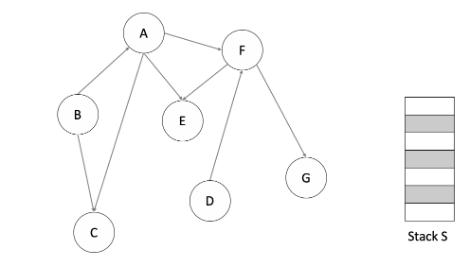

In [ ]:
def findOrder(self, numCourses, prerequisites):
    # create adjacency list to represent a graph
    graph = collections.defaultdict(list)
    for dest,src in prerequisites:
        graph[dest].append(src)

    topo_sort_order = []
    # set all vertces are unprocessed (0), processed(1), visited in dfs (-1)
    visited = [0 for _ in range(numCourses)] 

    def dfs(node):
        # don't recurse further if we found a cycle
        if visited[node] == -1: 
            return False
        # has been finished
        if visited[node] == 1:

            return True

        # start the recursion, mark as visited
        visited[node] = -1 # GRAY
        # travel on neighboring nodes
        for neighbor in graph[node]:
            if not dfs(neighbor):
                return False            
        # recursive end, mark it as finished
        visited[node] = 1 #BLACK
        topo_sort_order.append(node)
        return True

    for v in range(numCourses):
        # If node is unprocessed, then call dfs on it
        if not dfs(v):
            return []
    return topo_sort_order

In [3]:
import collections
def findOrder(numCourses, prerequisites):
    # create adjacency list to represent a graph
    neighbors = collections.defaultdict(set)
    dic = collections.defaultdict(set)
    for dest,src in prerequisites:
        neighbors[src].add(dest)
        dic[dest].add(src)

    res = []
    # store course which have no prerequisition
    stack = [i for i in range(numCourses) if not dic[i]]
    while stack:
        node = stack.pop()
        res.append(node)
        for i in neighbors[node]:
            dic[i].remove(node)
            if not dic[i]:
                stack.append(i)
        dic.pop(node)

    return res if not dic else []

findOrder(2,[[1,0]])

[0, 1]

## Approach 2: Using Node Indegree
Intuition

This approach is much easier to think about intuitively as will be clear from the following point/fact about topological ordering.

>The first node in the topological ordering will be the node that doesn't have any incoming edges. Essentially, any node that has an in-degree of 0 can start the topologically sorted order. If there are multiple such nodes, their relative order doesn't matter and they can appear in any order.

Our current algorithm is based on this idea. We first process all the nodes/course with 0 in-degree implying no prerequisite courses required. If we remove all these courses from the graph, along with their outgoing edges, we can find out the courses/nodes that should be processed next. These would again be the nodes with 0 in-degree. We can continuously do this until all the courses have been accounted for.

Algorithm

1. Initialize a queue, Q to keep a track of all the nodes in the graph with 0 in-degree.
2. Iterate over all the edges in the input and create an adjacency list and also a map of node v/s in-degree.
3. Add all the nodes with 0 in-degree to Q.
4. The following steps are to be done until the Q becomes empty.
    1. Pop a node from the Q. Let's call this node, N.
    2. For all the neighbors of this node, N, reduce their in-degree by 1. If any of the nodes' in-degree reaches 0, add it to the Q.
    3. Add the node N to the list maintaining topologically sorted order.
    4. Continue from step 4.1.



In [2]:
import collections
def findOrder(numCourses, prerequisites):
    indegree = collections.defaultdict(set)
    outdegree = collections.defaultdict(set)
    for dest,src in prerequisites:
        outdegree[src].add(dest)
        indegree[dest].add(src)
    # queue for maintaining list of nodes that have 0 in-degree   
    zero_indegree = [k for k in range(numCourses) if k not in indegree]
    res = []
    while zero_indegree:
        # pop one node with 0 in-degree
        node = zero_indegree.pop(0)
        res.append(node)

        #reduce in-degree by 1 for all the neighbors, if any of the nodes' in-degree reaches 0, add it to the queue
        for v in outdegree[node]:
            indegree[v].remove(node)
            if not indegree[v]:
                zero_indegree.append(v)

    return res if len(res) == numCourses else []

findOrder(2,[[1,0]])

[0, 1]